In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../Data/news_ai.csv')

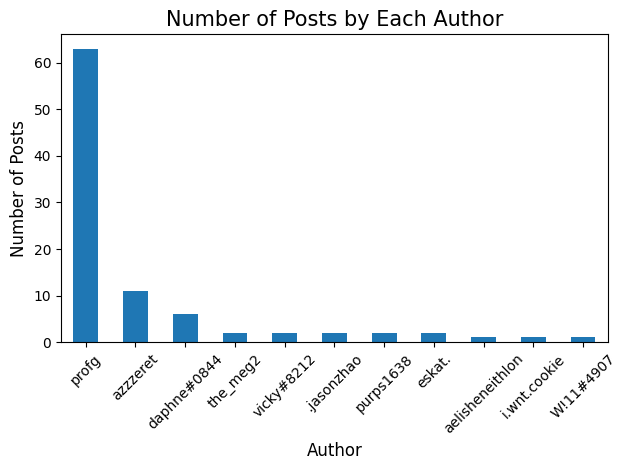

In [2]:
author_post_counts = df['Author'].value_counts()
plt.figure()
author_post_counts.plot(kind='bar')

plt.title('Number of Posts by Each Author', fontsize=15)
plt.xlabel('Author', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

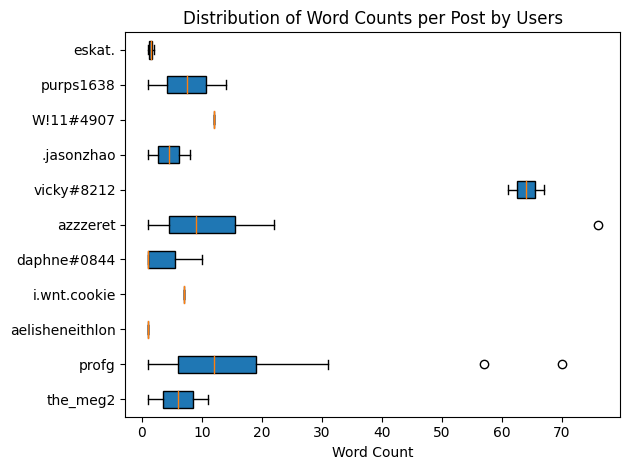

In [3]:
df['WordCount'] = df['Content'].apply(lambda x: len(str(x).split()))

word_counts_by_user = [df[df['Author'] == user]['WordCount'].tolist() for user in df['Author'].unique()]

plt.figure()
plt.boxplot(word_counts_by_user, vert=False, patch_artist=True, boxprops=dict())
plt.title('Distribution of Word Counts per Post by Users')
plt.xlabel('Word Count')

plt.yticks(range(1, len(df['Author'].unique()) + 1), df['Author'].unique())

plt.tight_layout()
plt.show()

